In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats
import pickle
from sklearn.model_selection import ParameterGrid
from model import *
from msb import *

In [2]:
def proportion_DM(all_genotypes, pop):
    pa = np.sum([pop[i] for i in range(len(pop)) if (all_genotypes[i][0] == 2)])
    return(pa)

In [3]:
param_dict = {'s': [0.01, 0.03, 0.05], 'tau': [2,10,100], 'mu':[0.000004, 0.00004]}
param_grid = list(ParameterGrid(param_dict))
noise_levels = np.logspace(-6, np.log10(0.5), 30)

genotype_names_3 = []
for i in range(4):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))
mutator_genotypes = [i for i in range(len(genotype_names_3)) if genotype_names_3[i][1] == 1]

In [12]:
genotype_names_3[20]
pop_size = 1000000000
nreps = 5
s = 0.03
gamma1, gamma2 = 1e-6, 1e-6


In [13]:
#def fixation_simulation(mu, tau, s, H, gamma1, gamma2, strain_fitness_vect, pop_size = 1000000000, nreps = 10):

pop_size = float(pop_size)
ncat = len(genotype_names_3)

result_per_noise = []

evol_mpf = np.zeros((100000,nreps))
print_p = True

times_fixated = []
times_extinct = []

noise = 0

extinct = 0
fixation = 0

msb_pop_sim = msb_simulation_4(genotype_names_3, 'MSB', s, -1, mu, tau, gamma1, gamma2)

transition_matrix = mutation_rate_transition_4(mu, tau, 5, gamma1, gamma2, beta = 5000)
proba_mut_dm = (tau * msb_pop_sim['pm']) / (1+tau * msb_pop_sim['pm'])

fitness_vector = fitness(genotype_names_3, s, H, 'V', strain_fitness_vect)
msb_pop = msb_pop_sim['pop']

results = np.zeros((nreps, ncat))

for rep in range(nreps):
    results[rep] = np.random.multinomial(pop_size, msb_pop)
    mut_or_baseline = np.random.binomial(1, proba_mut_dm)
    results[rep,[20,25][mut_or_baseline]] = 1.

results /= np.sum(results, axis = 1, keepdims = 1)

t = 0
update = (np.array([proportion_DM(genotype_names_3, results[i]) == 1. or proportion_DM(genotype_names_3, results[i]) == 0. for i in range(nreps)]))

while t < 99999:

    results = results @ transition_matrix
    results *= fitness_vector

    results /= np.sum(results, axis = 1, keepdims = True)

    for rep in np.arange(nreps):
        evol_mpf[t, rep] = np.sum(results[rep][mutator_genotypes])

    t += 1

    for rep in np.arange(nreps)[~update]:

        results[rep] = np.random.multinomial(pop_size, results[rep])

        if proportion_DM(genotype_names_3, results[rep]) / np.sum(results[rep]) ==  0.:
            extinct += 1.
            times_extinct.append(t)
            update[rep] = True
        elif proportion_DM(genotype_names_3, results[rep]) / np.sum(results[rep]) == 1.:
            fixation += 1.
            times_fixated.append(t)
            update[rep] = True


NameError: name 'H' is not defined

In [10]:
mu, tau, s = 4e-5,100,0.03
gamma_combs = list(product([1e-6,1e-3,0.5], [1e-6,1e-3,0.5]))

In [39]:
motifs = [[1,1.04,1.05],
          [1,0.97,1.03],
          [1,0.99,1.03],
          [1,1.025,1.05],
          [1,1,1.05]]

H = 10

In [40]:
all_motifs_results = []

for motif in motifs:

    all_results_gammacomb = []

    for n in range(len(gamma_combs)):

        gamma1, gamma2 = gamma_combs[n]

        start_time = time.time()

        times_fixation =  fixation_simulation(mu, tau, s, H, gamma1, gamma2, motif, pop_size = 1000000000, nreps = 5)

        print(motif, n, times_fixation[0], time.time()-start_time)

        all_results_gammacomb.append(times_fixation[-1])
        
    all_motifs_results.append(all_results_gammacomb)

[1, 1.04, 1.05] 0 1.0 6.414918422698975
[1, 1.04, 1.05] 1 1.0 6.440092325210571
[1, 1.04, 1.05] 2 0 6.359951019287109
[1, 1.04, 1.05] 3 1.0 6.450122356414795
[1, 1.04, 1.05] 4 0 6.37411642074585
[1, 1.04, 1.05] 5 1.0 6.359101295471191
[1, 1.04, 1.05] 6 1.0 6.275097608566284
[1, 1.04, 1.05] 7 2.0 6.537850618362427
[1, 1.04, 1.05] 8 1.0 6.472128391265869
[1, 0.97, 1.03] 0 0 6.374230861663818
[1, 0.97, 1.03] 1 1.0 6.41933536529541
[1, 0.97, 1.03] 2 0 6.21948766708374
[1, 0.97, 1.03] 3 0 6.718135118484497
[1, 0.97, 1.03] 4 2.0 6.718308210372925
[1, 0.97, 1.03] 5 0 6.46214485168457
[1, 0.97, 1.03] 6 1.0 6.56560754776001
[1, 0.97, 1.03] 7 1.0 6.5809855461120605
[1, 0.97, 1.03] 8 1.0 6.472703218460083
[1, 0.99, 1.03] 0 0 6.417500734329224
[1, 0.99, 1.03] 1 0 6.435683250427246
[1, 0.99, 1.03] 2 0 6.465077877044678
[1, 0.99, 1.03] 3 0 6.9766950607299805
[1, 0.99, 1.03] 4 0 6.469250917434692
[1, 0.99, 1.03] 5 0 6.424236297607422
[1, 0.99, 1.03] 6 0 6.299729585647583
[1, 0.99, 1.03] 7 0 6.3418960

In [ ]:
ind_ax = list(product(np.arange(3), np.arange(3)))

In [25]:
ind_ax

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [26]:
gamma_labels = ['$\gamma_1$ = $10^{-6}$ \n$\gamma_2$ = $10^{-6}$',
                    '$\gamma_1$ = $10^{-6}$ \n$\gamma_2$ = $10^{-3}$',
                    '$\gamma_1$ = $10^{-6}$ \n$\gamma_2$ = 0.5',
                    '$\gamma_1$ = $10^{-3}$ \n$\gamma_2$ = $10^{-6}$',
                    '$\gamma_1$ = $10^{-3}$ \n$\gamma_2$ = $10^{-3}$',
                    '$\gamma_1$ = $10^{-3}$ \n$\gamma_2$ = 0.5',
                    '$\gamma_1$ = 0.5 \n$\gamma_2$ = $10^{-6}$',
                    '$\gamma_1$ = 0.5 \n$\gamma_2$ = $10^{-3}$',
                    '$\gamma_1$ = 0.5 \n$\gamma_2$ = 0.5']

In [ ]:
gamma_combs

In [ ]:
for i in range(5):

    test_data = all_motifs_results[i]

    fig, ax = plt.subplots(3,3,figsize = (16,10))

    ax[0,0].plot(test_data[0][:,1][1:5000], c = 'black')
    ax[0,1].plot(test_data[1][:,1][1:5000], c = 'black')
    ax[0,2].plot(test_data[2][:,1][1:5000], c = 'black')

    ax[1,0].plot(test_data[3][:,1][1:5000], c = 'black')
    ax[1,1].plot(test_data[4][:,1][1:5000], c = 'black')
    ax[1,2].plot(test_data[5][:,1][1:5000], c = 'black')

    ax[2,0].plot(test_data[6][:,1][1:5000], c = 'black')
    ax[2,1].plot(test_data[7][:,1][1:5000], c = 'black')
    ax[2,2].plot(test_data[8][:,1][1:5000], c = 'black')
    
    for xind in ind_ax:
        ylims = ax[xind].get_ylim()
        yval = (0.7*(ylims[1]-ylims[0])+ylims[0])
        xlims = ax[xind].get_xlim()
        xval = (0.6*(xlims[1]-xlims[0]))
        ax[xind].text(xval, yval, gamma_labels[ind_ax.index(xind)], fontsize = 16)
        ax[xind].tick_params(labelsize = 13)
        ax[xind].yaxis.get_offset_text().set_fontsize(13)
        
    for j in range(3):
        ax[j,0].set_ylabel('Frequency of mutator', fontsize = 16)
        ax[2,j].set_xlabel('Number of generations since \nappearance of adaptive mutant', fontsize = 16)

    print(str(motifs[i]))
    
    plt.tight_layout()
    
    #plt.savefig('figures/mutation_rate_along_adaptation/figure_landscape_'+str(motifs[i])+'.jpg',
    #            dpi = 500, bbox_inches = 'tight')

    plt.show()

In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
gamma_combs

[(1e-06, 1e-06),
 (1e-06, 0.001),
 (1e-06, 0.5),
 (0.001, 1e-06),
 (0.001, 0.001),
 (0.001, 0.5),
 (0.5, 1e-06),
 (0.5, 0.001),
 (0.5, 0.5)]

<ipython-input-41-c0f62790fcd7>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0,i].set_ylim(0,0.25)
<ipython-input-41-c0f62790fcd7>:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[1,i].set_ylim(0,0.25)
<ipython-input-41-c0f62790fcd7>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[2,i].set_ylim(0,1.2)
<ipython-input-41-c0f62790fcd7>:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[3,i].set_ylim(0,0.6)
<ipython-input-41-c0f62790fcd7>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0,i].set_ylim(0,0.25)
<ipython-input-41-c0f62790fcd7>:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[

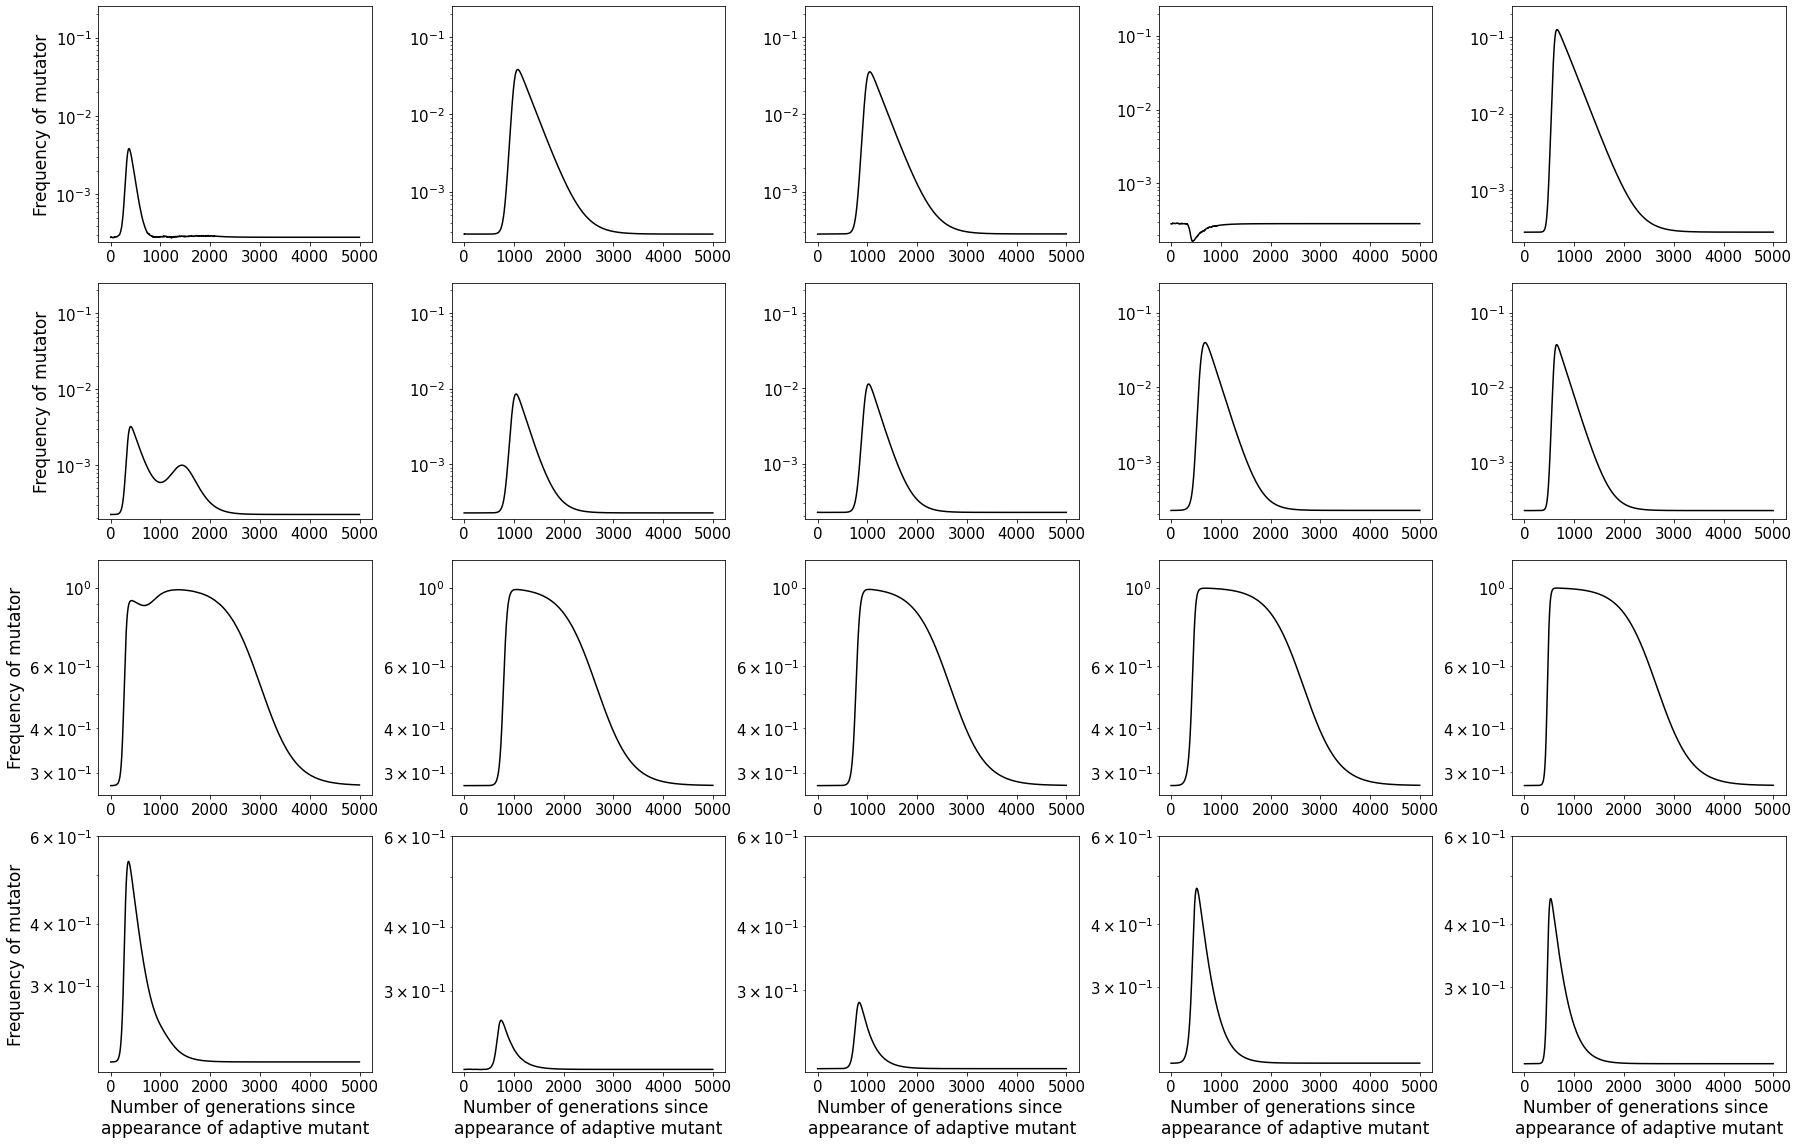

In [41]:
fig, ax = plt.subplots(4,5,figsize = (25,16))

for i in range(5):
    
    test_data = all_motifs_results[i]
    
    ax[0,i].plot(test_data[0][:,1][1:5000], c = 'black')
    ax[0,i].set_yscale('log')
    ax[0,i].set_ylim(0,0.25)
    
    ax[1,i].plot(test_data[1][:,1][1:5000], c = 'black')
    ax[1,i].set_yscale('log')
    ax[1,i].set_ylim(0,0.25)
    
    ax[2,i].plot(test_data[3][:,1][1:5000], c = 'black')
    ax[2,i].set_yscale('log')
    ax[2,i].set_ylim(0,1.2)

    ax[3,i].plot(test_data[4][:,1][1:5000], c = 'black')
    ax[3,i].set_yscale('log')
    ax[3,i].set_ylim(0,0.6)
    
for i in range(4):
    for j in range(5):
        ax[i,j].tick_params(labelsize = 15, which = 'both')
        ax[3,j].set_xlabel('Number of generations since \nappearance of adaptive mutant', fontsize = 17)
        ax[i,0].set_ylabel('Frequency of mutator', fontsize = 17)
        
plt.tight_layout()
#plt.savefig('figures/mutation_rate_along_adaptation/all_landscapes.jpg',
#            dpi = 500, bbox_inches = 'tight')

In [160]:
(0.53-0.45)/0.1

0.8000000000000002

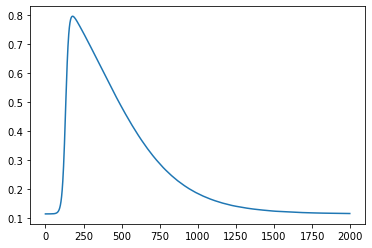

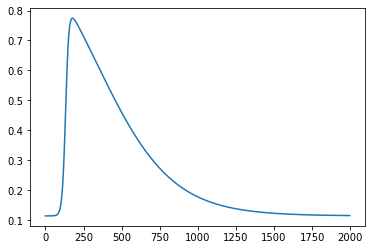

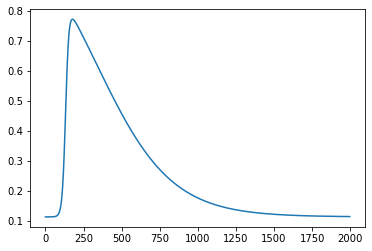

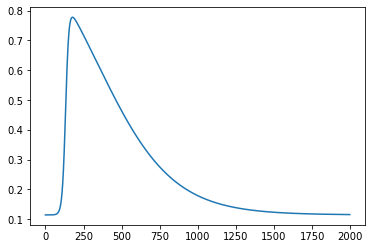

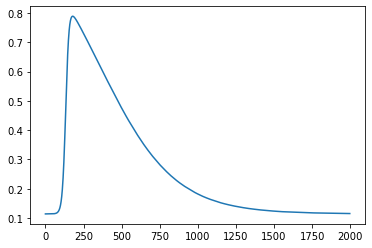

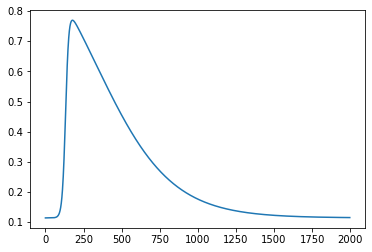

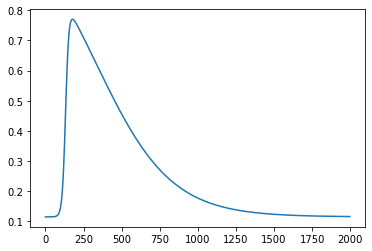

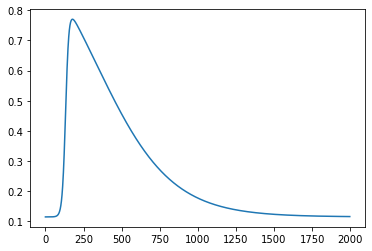

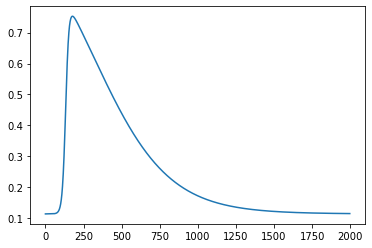

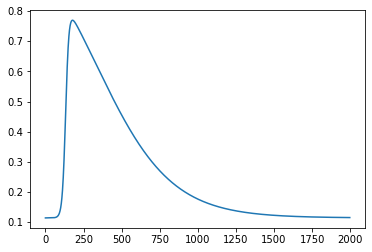

In [122]:
for n in range(10):
    plt.plot(test[-1][:,n][1:1999])
    plt.show()

In [97]:
test[-1][:,n][1:-2]

array([0.14205374, 0.14205597, 0.1420643 , ..., 0.14207621, 0.14207621,
       0.14207621])

In [100]:
msb_pop_sim

{'pm': 0.14203959613513756,
 'mpf': 0.9995282539192605,
 'time': 5535,
 'pop': array([8.52957140e-01, 4.85627638e-03, 1.34330922e-04, 9.92253990e-06,
        6.71277339e-07, 1.06252828e-01, 3.01596408e-02, 4.97820446e-03,
        5.79894362e-04, 5.21935842e-05, 1.94254649e-06, 1.07471044e-07,
        1.19078186e-08, 1.07411550e-09, 7.90900774e-11, 1.20645482e-05,
        3.98281070e-06, 6.95918410e-07, 8.35153201e-08, 7.65577477e-09,
        1.07477351e-11, 2.38171786e-12, 3.22256181e-13, 3.16381913e-14,
        2.45790287e-15, 3.98305785e-10, 1.39192718e-10, 2.50562718e-11,
        3.06251915e-12, 2.84243041e-13])}

In [99]:
msb_pop_sim = msb_simulation(genotype_names_3, 'MSB', s, -1, mu, tau, gamma1, gamma2)